# Ch.1　Positive Definite Kernel（Problem 1～15）

In [1]:
# The program in Chapter 1 assumes that the following are executed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

### 2

In [2]:
def k(x, y, lam):
    return D(np.abs((x - y) / lam))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

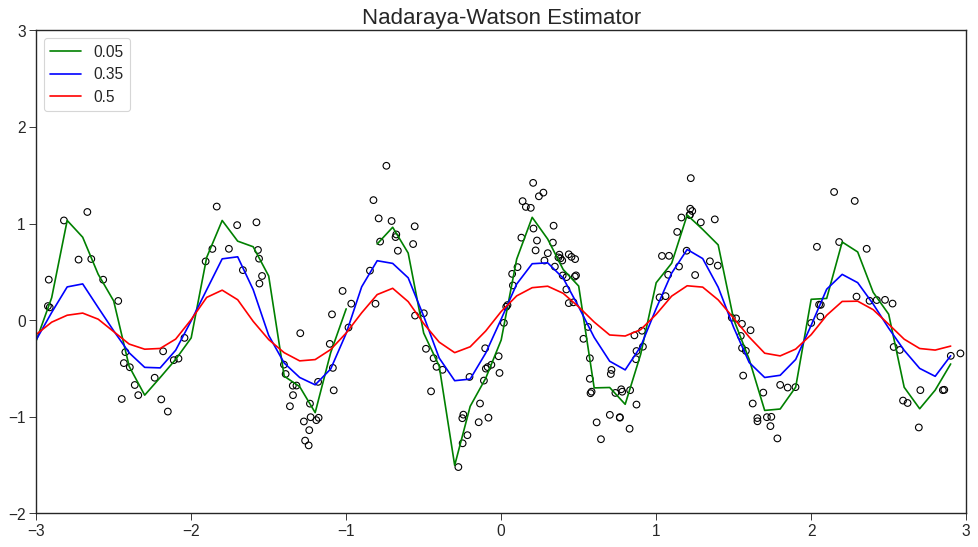

In [8]:
n = 250
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4

plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")

xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(3)]
lam = [0.05, 0.35, 0.50]
color = ["g", "b", "r"]
for i in range(3):
    for zz in xx:
        yy[i].append(f(zz, lam[i]))
    plt.plot(xx, yy[i], c=color[i], label=lam[i])

plt.legend(loc="upper left", frameon=True, prop={'size': 14})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

### 8

In [ ]:
def K(x, y, sigma2):
    return np.exp(-np.linalg.norm(x - y)**2 / 2 / sigma2)


n = 100
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4

m = int(n / 10)
sigma2_seq = np.arange(0.001, 0.01, 0.001)
SS_min = np.inf
for sigma2 in sigma2_seq:
    SS = 0
    for k in range(10):
        test = range(k * m, (k+1) * m)
        train = [x for x in range(n) if x not in test]
        for j in test:
            u, v = 0, 0
            for i in train:
                kk = K(x[i], x[j], sigma2)
                u = u + kk * y[i]
                v = v + kk
            if not(v == 0):
                z = u / v
                SS = SS + (y[j] - z)**2
    if SS < SS_min:
        SS_min = SS
        sigma2_best = sigma2
print("Best sigma2 =", sigma2_best)

### 12


In [ ]:
def string_kernel(x, y):
    m, n = len(x), len(y)
    S = 0
    for i in range(m):
        for j in range(i, m):
            for k in range(n):
                if x[(i-1):j] == y[(k-1):(k+j-i)]:
                    S = S + 1
    return S

### 15

In [ ]:
def k(s, p):
    return prob(s, p) / len(node)


def prob(s, p):
    if len(node[s[0]]) == 0:
        return 0
    if len(s) == 1:
        return p
    m = len(s)
    S = (1 - p) / len(node[s[0]]) * prob(s[1:m], p)
    return S